In [4]:
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 경로 설정 (가장 중요!) ---

# 현재 노트북 폴더(.../ch06)의 절대 경로를 가져옵니다.
current_dir = os.getcwd() 

# 프로젝트 최상위 폴더(.../DL-Excersize)의 경로를 계산합니다.
# (ch06 -> DL3... -> notebooks -> DL-Excersize)
project_root = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))

# 파이썬이 'common' 폴더를 찾을 수 있도록 최상위 폴더를 sys.path에 추가합니다.
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"'{project_root}' 경로를 sys.path에 추가했습니다.")

# --- 2. 임포트 실행 ---

# 이제 ch06 폴더에 있는 simple_convnet을 임포트합니다.
# (파일이 같은 폴더에 있으므로 'ch06.'을 빼고 파일 이름(simple_convnet)만 씁니다)
from simple_convnet import SimpleConvNet

print("Import 성공! SimpleConvNet을 정상적으로 불러왔습니다.")

Import 성공! SimpleConvNet을 정상적으로 불러왔습니다.


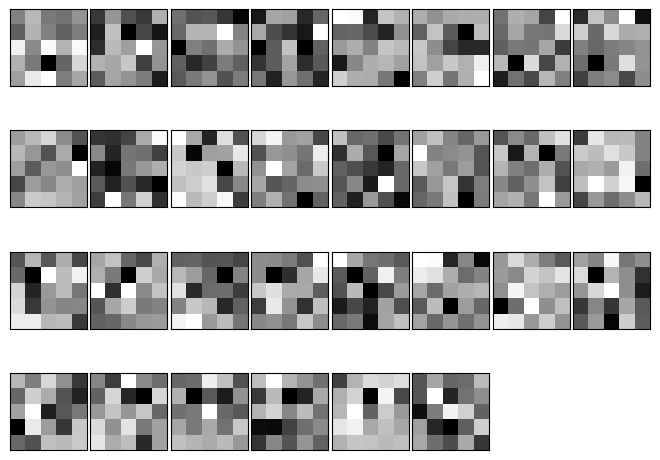

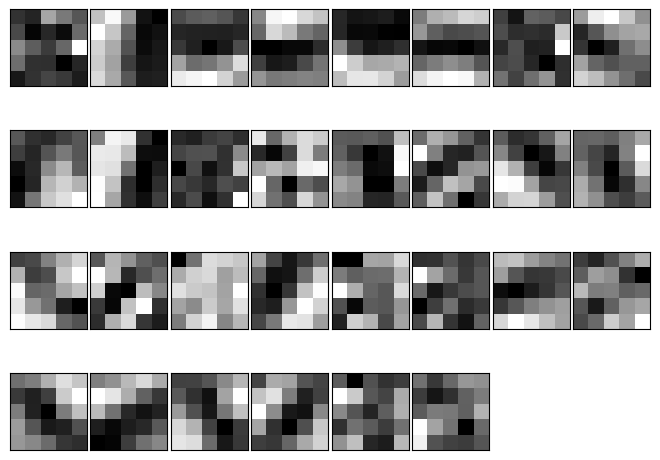

In [ ]:
def filter_show(filters, nx=8, margin=3, scale=10):
    """
    합성곱 계층의 필터 시각화
    
    Parameters
    ----------
    filters : 필터 가중치 (예: W1)
    nx : 한 줄에 그릴 필터 수
    margin : 필터 간 여백
    scale : 필터 크기 확대 비율
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')

    plt.show()

# 무작위(랜덤) 초기화 후의 가중치 (학습 전)
network = SimpleConvNet()
filter_show(network.params['W1']) 

# 학습된 가중치 로드 후 (학습 후)
network.load_params(r"C:\Users\EL90\OneDrive - (주)엘릭서\MS AI 8기\수업자료\workspace\DL-Excersize\notebooks\DL3_20241006\ch06\params.pkl")
filter_show(network.params['W1'])

#절대 참조 내 슬래시를 잘못인식하는 경우가 있으니 r"절대참조" 해서 링크로 인식하게 해주기~~~~









![alt text](image.png)

![alt text](image-1.png)


딥러닝이 **이미지를 "이해"**하게 만드는 **합성곱 신경망(CNN, Convolutional Neural Network)**의 가장 핵심적인 원리들입니다. 

20년차 개발자 선배로서, 이 복잡해 보이는 개념들을 10대 학생분도 쉽게 이해할 수 있도록 '탐정' 비유로 설명해 드릴게요. 🕵️‍♂️

1. 🖼️ 합성곱 신경망(CNN), 왜 이미지에 쓸까요?
이전에 02.신경망... 파일에서 MNIST 손글씨를 배울 때를 떠올려보세요. 그때 우리는 28x28 픽셀 이미지를 784개의 1줄짜리 데이터로 "납작하게 폈습니다". 



기존 신경망(DNN)의 문제점: 이미지를 납작하게 펴버리면, "이 픽셀이 저 픽셀 옆에 있다"는 중요한 공간 정보가 모두 사라집니다. 


비유: 사진을 잘게 찢어서 한 줄로 이어 붙이는 것과 같습니다. 원래 그림이 뭐였는지 알아보기 힘들어지겠죠?


CNN의 해결책: CNN은 이미지를 납작하게 펴지 않고, 2차원(혹은 3차원) 이미지 그대로 입력받아 "부분 부분"을 훑어보며 특징을 파악합니다. 

결론: 네, 맞습니다! CNN이 딥러닝에서 중요한 이유는 바로 '이미지' 때문입니다. 이미지의 '공간 정보'를 잃어버리지 않고 학습할 수 있게 해주는, AI의 '눈' 역할을 하는 기술입니다.

2. 🔍 필터(Filter)와 피처맵(Feature Map)의 의미
질문하신 **"필터로 특징을 잡아낸다"**는 것이 CNN의 핵심 동작입니다.

합성곱 연산 (Filter):

비유: 탐정(CNN)이 범죄 현장(이미지)에서 **'특정 무늬'만 찾는 돋보기(Filter)**를 가졌다고 상상해 보세요.

한 돋보기는 '수직선(|)' 무늬만 찾고, 다른 돋보기는 '가로선(—)' 무늬만, 또 다른 돋보기는 '둥근 모서리( '(' )'만 찾습니다.

'합성곱 연산'은 이 돋보기(필터)를 들고 이미지의 왼쪽 위부터 오른쪽 아래까지 쭉 훑어보는(Scanning) 행동입니다. 


피처맵 (Feature Map):

비유: '수직선 돋보기'로 이미지를 다 훑어본 탐정이, 수직선이 발견된 위치만 지도(Map)에 표시한 것입니다.

"아하! 이 이미지의 왼쪽과 오른쪽에 수직선(특징)이 많군!"

이 '특징 지도(Feature Map)' 가 바로 다음 층으로 전달되는 입력값이 됩니다.

학습 유의미성 (가장 중요!):

처음엔 탐정이 어떤 돋보기(필터)를 써야 할지 모릅니다. 


**학습(Learning)**이란, "고양이" 사진을 맞히기 위해 수많은 훈련을 거치며 가장 유용한 돋보기(필터)를 스스로 만들어내는 과정입니다. 


얕은 층(Layer 1)은 '선', '모서리' 같은 단순한 특징을, 깊은 층(Layer 3)은 '눈', '코', '얼굴 형태' 같은 복잡한 특징을 찾아내는 돋보기(필터)를 갖게 됩니다. 


3. 🖼️ 패딩(Padding)과 스트라이드(Stride)
이 두 가지는 탐정이 돋보기(필터)로 이미지를 **"어떻게" 훑어볼지 정하는 기술(방법론)**이 맞습니다.

패딩 (Padding):

비유: 사진의 '가장자리(테두리)' 문제입니다. 돋보기로 사진 중앙은 여러 번 훑어볼 수 있지만, 가장자리 픽셀은 딱 한 번만 훑어보게 되어 정보가 소실됩니다.


해결책: padding=1 은 사진 바깥쪽에 **'0'으로 채워진 투명한 테두리(패딩)**를 한 줄 추가하는 것입니다.  이렇게 하면 돋보기가 가장자리 픽셀도 공평하게 여러 번 훑어볼 수 있게 됩니다.


기능: 이미지의 가장자리 정보를 보존하고, 피처맵의 크기가 너무 빨리 줄어드는 것을 막아줍니다.

스트라이드 (Stride):


비유: 돋보기를 들고 이동하는 **'보폭(걸음걸이)'**입니다. 

stride=1: 돋보기를 1픽셀씩 촘촘하게 이동합니다. (정밀하지만 느림)

stride=2: 돋보기를 2픽셀씩 성큼성큼 이동합니다. (정보를 조금 건너뛰지만, 훨씬 빠르고 피처맵 크기도 작아집니다.) 

기능: 연산 속도를 조절하고 피처맵의 크기(해상도)를 줄이는 데 사용됩니다.

4. 🎨 "이미지가 3장으로 구성" (컬러 채널)
그건 바로 컬러 이미지를 '빛의 3원색'으로 분해하는 방식 때문입니다.

비유: 우리가 보는 컬러 TV 화면은 사실 **빨간색(R), 초록색(G), 파란색(B)**이라는 3가지 색깔의 점들이 모여 만들어집니다.

의미: 컬러 이미지는 컴퓨터에게 3장의 흑백 사진이 겹쳐진 것처럼 보입니다.

1번 장(Channel 1): '빨간색' 성분만 모아놓은 흑백사진

2번 장(Channel 2): '초록색' 성분만 모아놓은 흑백사진

3번 장(Channel 3): '파란색' 성분만 모아놓은 흑백사진

3차원 텐서: 그래서 (28x28) 크기의 흑백 이미지는 (28, 28, 1)로 표현하지만, 컬러 이미지는 (224, 224, 3)처럼 "채널(Channel)"이 3인 3차원 데이터(텐서)가 됩니다.

합성곱 적용: 이 경우 돋보기(필터)도 3장짜리, 즉 3D 돋보기(예: 3x3x3)가 되어야 합니다. 3장의 채널을 동시에 훑어보고 1개의 피처맵을 만들어냅니다.